In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import RandomizedSearchCV

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  *
from sklearn.utils import resample

In [9]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()


In [ ]:
import numpy as np

In [33]:
df_2 = pd.read_csv('ml_final_final_final.csv', index_col = False)

In [34]:
df_2.drop('Unnamed: 0', axis = 1, inplace = True)

In [35]:
df_2.profit.describe()

count      5614.000000
mean      36231.418244
std       46198.181346
min     -136947.000000
25%         133.797000
50%       19678.000000
75%       58971.750000
max      181041.000000
Name: profit, dtype: float64

In [36]:
df_2['clase'] = df_2['profit']

In [37]:
df_2.to_csv('sha_acabat_la_broma.csv')

In [38]:
for i in range(len(df_2.clase)):
    if df_2['clase'][i] < 0:
        df_2['clase'][i] = 'neg'
    elif df_2['clase'][i] < 19678:
        df_2['clase'][i] = 'low'
    elif df_2['clase'][i] < 58971:
        df_2['clase'][i] = 'med'
    else:
        df_2['clase'][i]= 'hig'

<ipython-input-38-c5331245e470>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clase'][i] = 'low'
E:\programes secundaris\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-38-c5331245e470>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clase'][i] = 'med'
<ipython-input-38-c5331245e470>:9: SettingWithCopyWarning:

In [11]:
df_transaccions = pd.read_csv('df_t_noOut.csv', index_col = False)

In [14]:
df_transaccions.drop(['Unnamed: 0', 'id', 'owner', 'new_owner', 'transaction'], 1, inplace = True)

In [15]:
df_transaccions

id_punk_tipus  amount  Amount_dollars  type_transaction_id
0                  0     100          157105                    1
1                  0      69           25177                    1
2                  0      69           25117                    2
3                  0      49            6991                    1
4                  0      49            6758                    2
...              ...     ...             ...                  ...
99357           9999       0              68                    2
99358           9999       0              68                    2
99359           9999       0              56                    2
99360           9999       0              59                    2
99361           9999       0              46                    2

[99362 rows x 4 columns]

In [16]:
df_transaccions.type_transaction_id.value_counts()

4    47306
2    23322
3    14665
1    14069
Name: type_transaction_id, dtype: int64

In [23]:
index = df_transaccions['type_transaction_id'][df_transaccions ['type_transaction_id'] == 4].index

In [24]:
df_transaccions.drop(index, 0, inplace = True)

In [26]:
index = df_transaccions['type_transaction_id'][df_transaccions ['type_transaction_id'] == 1].index

In [27]:
df_transaccions.drop(index, 0, inplace = True)

In [57]:
list_num = []

In [46]:
for i in df_transaccions.id_punk_tipus:
    if i not in list_ids:
        index = df_transaccions['id_punk_tipus'][df_transaccions ['id_punk_tipus'] == i].index
        df_transaccions.drop(index, 0, inplace = True)

In [82]:
for i in df_transaccions.id_punk_tipus:
    index = df_transaccions['id_punk_tipus'][df_transaccions.id_punk_tipus == i].index
    df_transaccions['numb_t'][index] = int(df_transaccions['id_punk_tipus'][df_transaccions.id_punk_tipus == i].value_counts())

In [94]:
df_transaccions.rename(columns = {'id_punk_tipus': 'id'}, inplace = True)

In [86]:
df_transaccions.drop(['amount', 'Amount_dollars', 'type_transaction_id'],1, inplace = True)

In [97]:
df_2

id  type  skin  number_traits  rarity   0   1   2   3  \
0        0     4     7            4.0    2023  21   0  43   0   
1        1     5     5            2.0    4352  69  35   0   0   
2       14     4     5            3.0     155  85   3  58   0   
3       53     4     6            2.0    2825  80  25   0   0   
4      116     4     5            4.0     220  82  63   0   4   
...    ...   ...   ...            ...     ...  ..  ..  ..  ..   
5609  9979     5     6            4.0    7564  86   0  81  55   
5610  9980     4     7            4.0    1159  82  13  86  76   
5611  9989     4     5            3.0     186  86  85   3   0   
5612  9990     5     4            2.0    9186  79  69   0   0   
5613  9998     4     7            3.0    1271  82  62  14   0   

      transaction_type  Amount_dollars      profit clase  Number_transactions  
0                  3.0     2844.250000    2554.000   low                    0  
1                  3.0    36955.200000   36850.000   med                    0  
2                  3.0      233.175000      57.000   low                    0  
3                  3.0    43022.980000   15554.000   low                    0  
4                  3.0      456.384000     188.000   low                    0  
...                ...             ...         ...   ...                  ...  
5609               3.0     1770.400000    1561.000   low                    0  
5610               3.0   179557.950000  179487.000   hig                    0  
5611               3.0      139.668000     139.668   low                    0  
5612               3.0        0.029118  -44212.000   neg                    0  
5613               3.0    59699.900000   49444.000   med                    0  

[5614 rows x 14 columns]

In [114]:
df = pd.DataFrame(columns = ['id','Numb_t'])

In [116]:
for i in df_transaccions['id'].unique():
    df_id = df_transaccions[df_transaccions.id == i]
    df = df.append(df_id[:1])

In [118]:
df.drop(['Numb_t'], 1, inplace = True)

In [ ]:
df_transaccions

In [119]:
df_8 = pd.merge(df, df_2, on ='id', validate = '1:1'  )

In [122]:
df_8.drop(['id','transaction_type','Amount_dollars', 'profit', 'Number_transactions'], 1, inplace = True)

In [124]:
df_8.to_csv('one_more.csv')

In [126]:
clf_mod = RandomForestClassifier(n_estimators= 1000,
                                 min_samples_split= 2,
                                 min_samples_leaf= 4,
                                 max_features= 'auto',
                                 max_depth= 10,
                                 criterion= 'gini',
                                 bootstrap= True)

In [128]:
X = df_8.drop('clase', axis = 1)
y = df_8.clase

In [130]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [132]:
clf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [133]:
prediction_2 = clf_mod.predict(X_test)

In [134]:
print('Accuracy: ', accuracy_score(y_test, prediction_2))
print('f1_score: ', f1_score(y_test, prediction_2, average = 'weighted'))
print('recall score: ',recall_score(y_test, prediction_2, average = 'weighted'))

Accuracy:  0.47177658942364825
f1_score:  0.41344997702828185
recall score:  0.47177658942364825


In [135]:
 from sklearn.model_selection import cross_val_score

In [222]:
df_7 = df_8

In [226]:
df_8.drop('rarity',1, inplace = True)

In [228]:
neg = df_8[df_2.clase == 'neg']
low = df_8[df_2.clase == 'low']
med = df_8[df_2.clase == 'med']
hig = df_8[df_2.clase == 'hig']

<ipython-input-228-927b7519533b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg = df_8[df_2.clase == 'neg']
<ipython-input-228-927b7519533b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low = df_8[df_2.clase == 'low']
<ipython-input-228-927b7519533b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med = df_8[df_2.clase == 'med']
<ipython-input-228-927b7519533b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hig = df_8[df_2.clase == 'hig']


In [229]:
#upsample minority
neg_upsampled = resample(neg, replace = True, n_samples = 1500)
med_upsampled = resample(med, replace = True, n_samples = 2000)
hig_upsampled = resample(hig, replace = True, n_samples = 2000)


In [230]:
upsampled = pd.concat([neg_upsampled, low, med_upsampled, hig_upsampled])

In [231]:
upsampled

numb_t  type  skin  number_traits   0   1   2   3 clase
2841     2.0     4     6            2.0  63  74   0   0   low
2740     3.0     5     5            4.0  86  45  28  11   low
4864     6.0     5     6            3.0  41  68  44   0   low
3630     4.0     4     7            2.0  13  78   0   0   hig
2672    10.0     5     4            4.0   0  83  33  61   hig
...      ...   ...   ...            ...  ..  ..  ..  ..   ...
419      1.0     5     7            2.0  38  64   0   0   hig
4998     1.0     4     7            2.0  76  27   0   0   low
3932     3.0     4     4            3.0  42   0  74   0   med
2637     8.0     4     6            2.0  27  12   0   0   hig
3685     7.0     5     6            3.0  18  79  57   0   low

[7939 rows x 9 columns]

In [232]:
X = upsampled.drop('clase', axis = 1)
y = upsampled.clase

In [233]:
upsampled.clase.value_counts()

low    2971
med    2008
hig    2007
neg     953
Name: clase, dtype: int64

In [234]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [236]:
clf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [237]:
prediction_2 = clf_mod.predict(X_test)

In [238]:
print('Accuracy: ', accuracy_score(y_test, prediction_2))
print('f1_score: ', f1_score(y_test, prediction_2, average = 'weighted'))
print('recall score: ',recall_score(y_test, prediction_2, average = 'weighted'))

Accuracy:  0.5646515533165407
f1_score:  0.5441164733409053
recall score:  0.5646515533165407


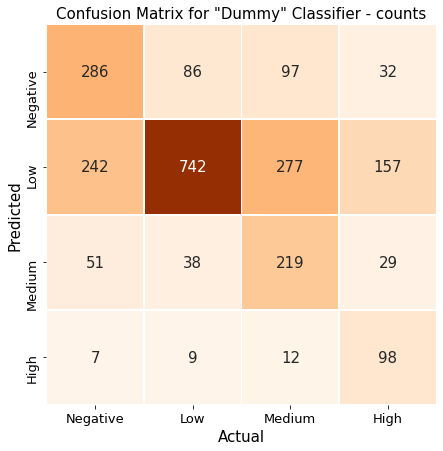

In [239]:
cm_logis = confusion_matrix(y_test, prediction_2)
#Put it into a df for sns plot function
cm_logis_df = pd.DataFrame(cm_logis)

#Use a sns heatmap to plot confusion matrices 
#The df is transposed to make actual values on x-axis and predicted on y-axis
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot = True, annot_kws={'size':15}, cmap = 'Oranges', vmin = 0, vmax = 800, fmt = '.0f', 
           linewidths = 1, linecolor = 'white', cbar = False)
plt.ylabel('Predicted', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
ax.set_xticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
ax.set_yticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
plt.title('Confusion Matrix for "Dummy" Classifier - counts', fontsize = 15 )
plt.show()

In [240]:
df_8

numb_t  type  skin  number_traits   0   1   2   3 clase
0       20.0     4     7            4.0  21   0  43   0   low
1       16.0     5     5            2.0  69  35   0   0   med
2       17.0     4     5            3.0  85   3  58   0   low
3        8.0     4     6            2.0  80  25   0   0   low
4        7.0     4     5            4.0  82  63   0   4   low
...      ...   ...   ...            ...  ..  ..  ..  ..   ...
5602     4.0     5     6            4.0  86   0  81  55   low
5603    15.0     4     7            4.0  82  13  86  76   hig
5604     8.0     4     5            3.0  86  85   3   0   low
5605     2.0     5     4            2.0  79  69   0   0   neg
5606     3.0     4     7            3.0  82  62  14   0   med

[5607 rows x 9 columns]

In [ ]:
['Numb_transactions','']

In [246]:
importances = clf_mod.feature_importances_

In [248]:
importances

array([0.27736369, 0.03538629, 0.07635875, 0.03419241, 0.19196167,
       0.20550072, 0.13031743, 0.04891904])

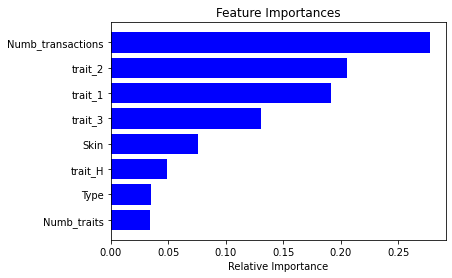

In [252]:
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),['Numb_traits','Type','trait_H','Skin','trait_3','trait_1','trait_2','Numb_transactions'])
plt.xlabel('Relative Importance')
plt.show()

In [136]:
scores = cross_val_score(clf_mod, X_train, y_train, cv = 5)

In [137]:
scores

array([0.47770701, 0.47643312, 0.4866242 , 0.48280255, 0.48086735])

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist
from sklearn.compose import ColumnTransformer

In [139]:
df_9 = df_8.drop('clase',1)

In [160]:
df_10 = df_9

In [141]:
df_9

numb_t  type  skin  number_traits  rarity   0   1   2   3
0       20.0     4     7            4.0    2023  21   0  43   0
1       16.0     5     5            2.0    4352  69  35   0   0
2       17.0     4     5            3.0     155  85   3  58   0
3        8.0     4     6            2.0    2825  80  25   0   0
4        7.0     4     5            4.0     220  82  63   0   4
...      ...   ...   ...            ...     ...  ..  ..  ..  ..
5602     4.0     5     6            4.0    7564  86   0  81  55
5603    15.0     4     7            4.0    1159  82  13  86  76
5604     8.0     4     5            3.0     186  86  85   3   0
5605     2.0     5     4            2.0    9186  79  69   0   0
5606     3.0     4     7            3.0    1271  82  62  14   0

[5607 rows x 9 columns]

In [162]:
features = df_9
scaler = MinMaxScaler().fit(features.values)
df_9[features.columns] = scaler.transform(features.values)

In [163]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_9)
 
    distortions.append(sum(np.min(cdist(df_9, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_9.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_9, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_9.shape[0]
    mapping2[k] = kmeanModel.inertia_

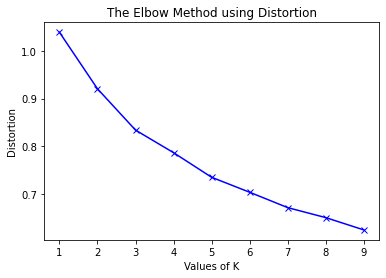

In [164]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

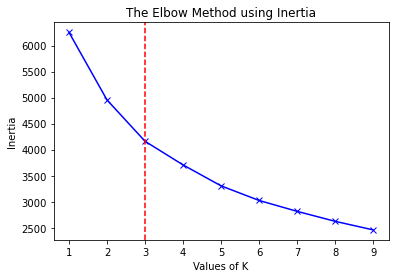

In [165]:
plt.plot(K, inertias, 'bx-')
plt.axvline(3, color='r', ls='--')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [166]:
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

3

In [167]:
kmeans = KMeans(n_clusters = 3)

In [168]:
kmeans.fit(df_9)

KMeans(n_clusters=3)

In [169]:
df_9['Clusters'] = kmeans.fit_predict(df_9)

In [170]:
df_9

numb_t  type      skin  number_traits    rarity         0         1  \
0     0.500000   0.0  1.000000            1.0  0.197928  0.244186  0.000000   
1     0.394737   1.0  0.333333            0.0  0.432163  0.802326  0.406977   
2     0.421053   0.0  0.333333            0.5  0.010057  0.988372  0.034884   
3     0.184211   0.0  0.666667            0.0  0.278588  0.930233  0.290698   
4     0.157895   0.0  0.333333            1.0  0.016595  0.953488  0.732558   
...        ...   ...       ...            ...       ...       ...       ...   
5602  0.078947   1.0  0.666667            1.0  0.755205  1.000000  0.000000   
5603  0.368421   0.0  1.000000            1.0  0.111033  0.953488  0.151163   
5604  0.184211   0.0  0.333333            0.5  0.013175  1.000000  0.988372   
5605  0.026316   1.0  0.000000            0.0  0.918335  0.918605  0.802326   
5606  0.052632   0.0  1.000000            0.5  0.122297  0.953488  0.720930   

             2         3  Clusters  
0     0.500000  0.000000         1  
1     0.000000  0.000000         2  
2     0.674419  0.000000         1  
3     0.000000  0.000000         1  
4     0.000000  0.047059         1  
...        ...       ...       ...  
5602  0.941860  0.647059         0  
5603  1.000000  0.894118         1  
5604  0.034884  0.000000         1  
5605  0.000000  0.000000         0  
5606  0.162791  0.000000         1  

[5607 rows x 10 columns]

<AxesSubplot:xlabel='rarity', ylabel='skin'>

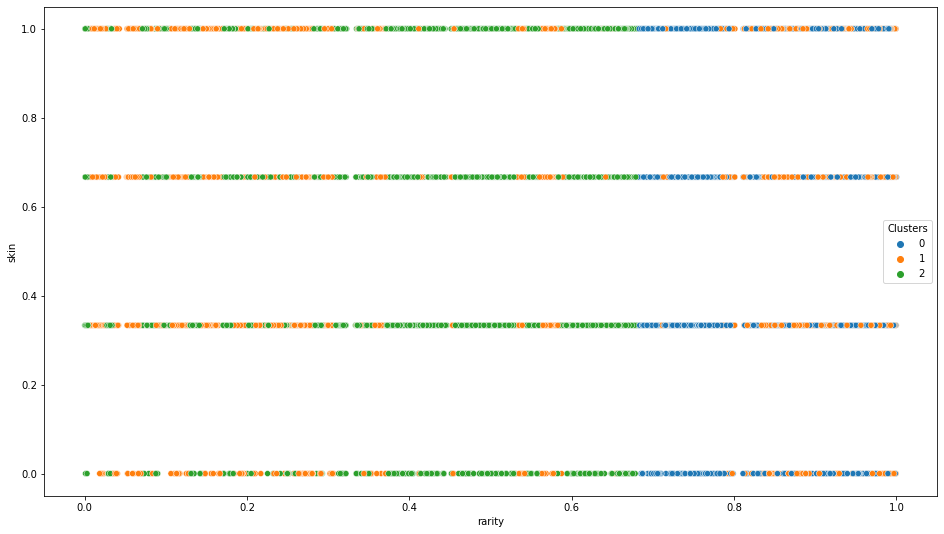

In [173]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df_9, x='rarity', y='', hue="Clusters",palette=["C0", "C1", "C2"])

In [175]:
df_scaledPCA = df_9.drop('Clusters',1)

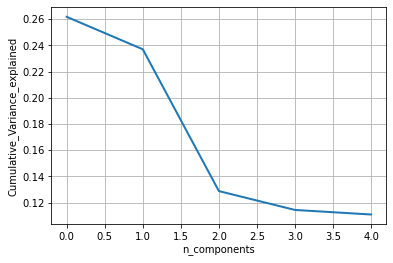

In [176]:
pca=PCA()  
pca.n_components=5 
pca_data=pca.fit_transform(df_scaledPCA)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(percentage_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [188]:
# Silhouette coefficient
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
silhouette_coefficients = []

for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients   

[0.5904830844869817,
 0.5618888792116761,
 0.5625068343749065,
 0.5677275978270058,
 0.5468293124783755]

In [191]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan', 'magenta']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60);
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);
plt.savefig('kmeans3d.png', bbox_inches ="tight", dpi = 300)

IndexError: list index out of range

In [203]:
df_2[df_2.id == 2294]

id  type  skin  number_traits  rarity   0   1   2  3  transaction_type  \
874  2294     5     5            3.0    4846  80  37  47  0               3.0   

     Amount_dollars   profit clase  Number_transactions  
874        162376.5  64954.0   hig                    0

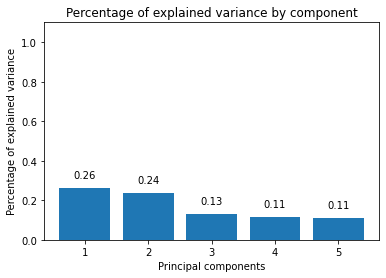

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_9.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of explained variance by component')
ax.set_xlabel('Principal components')
ax.set_ylabel('Percentage of explained variance');

In [180]:
pca_data = pd.DataFrame(pca_data)

In [181]:
pca_data=pca_data.loc[:,:2]

In [182]:
pca_data.rename(columns={0: 'principal component 1', 1: 'principal component 2',2:'principal component 3'}, inplace=True)

In [184]:
pca_data['Clusters'] = kmeans.fit_predict(pca_data)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

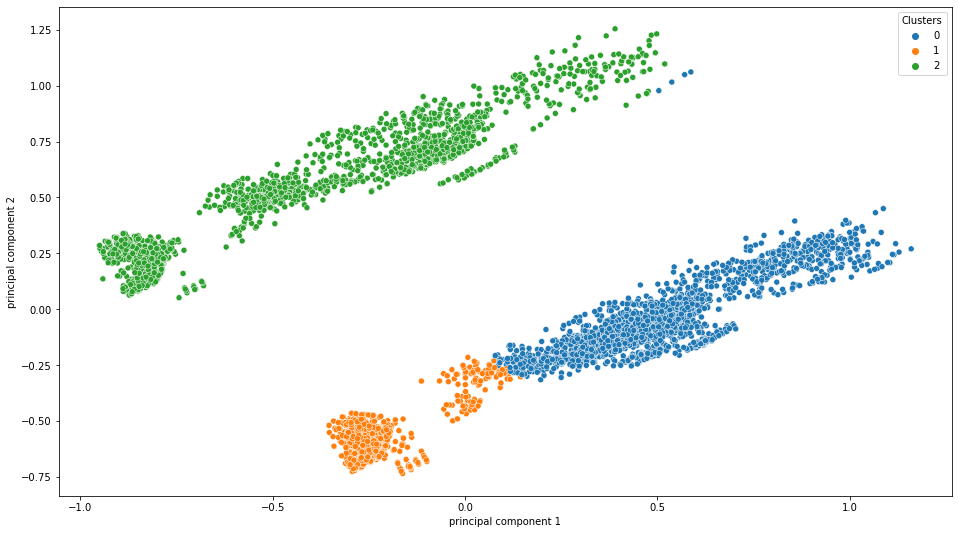

In [186]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=pca_data, x="principal component 1", y="principal component 2", hue="Clusters",palette=["C0", "C1", "C2"])

In [349]:
df_5 = df_2

In [350]:
df_5.type.unique()

array([4, 5], dtype=int64)

In [351]:
df_5['type_2'] = df_5.type

In [352]:
df_5.type.replace({5: 0, 4:1}, inplace = True)

In [353]:
df_5.type_2.replace({5: 1, 4:0}, inplace = True)

In [354]:
df.skin.unique()

array([7, 5, 6, 4], dtype=int64)

In [355]:
df_5['skin_2'] = df_5.skin
df_5['skin_3'] = df_5.skin
df_5['skin_4'] = df_5.skin

In [356]:
dic_types = {7:0, 5:0, 6:0, 4:1}

In [357]:
df_5.skin.replace({7:0, 5:0, 6:0, 4:1}, inplace = True)
df_5.skin_2.replace({7:0, 5:0, 6:1, 4:0}, inplace = True)
df_5.skin_3.replace({7:0, 5:1, 6:0, 4:0},  inplace = True)
df_5.skin_4.replace({7:1, 5:0, 6:0, 4:0},  inplace = True)

In [360]:
df_5.drop(['id', 'Amount_dollars', 'profit', 'transaction_type'], axis = 1, inplace = True)

In [362]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [363]:
df_5['number_traits'] = lab_enc.fit_transform(df_5.number_traits)

In [365]:
df_5['0'] = lab_enc.fit_transform(df_5['0'])

In [366]:
df_5['1'] = lab_enc.fit_transform(df_5['1'])

In [367]:
df_5['2'] = lab_enc.fit_transform(df_5['2'])
df_5['3'] = lab_enc.fit_transform(df_5['3'])

In [368]:
df_5['clase'] = lab_enc.fit_transform(df_5['clase'])

In [373]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [375]:
df_5['rarity'] = scaler.fit_transform(df_5['rarity'])

ValueError: Expected 2D array, got 1D array instead:
array=[2023. 4352.  155. ...  186. 9186. 1271.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [376]:
df_5.drop(['rarity'], axis = 1, inplace = True)

In [377]:
df_5

type  skin  number_traits   0   1   2   3  clase  type_2  skin_2  \
0        1     0              2  18   0  36   0      1       0       0   
1        0     0              0  63  35   0   0      2       1       0   
2        1     0              1  78   3  50   0      1       0       0   
3        1     0              0  73  25   0   0      1       0       1   
4        1     0              2  75  62   0   3      1       0       0   
...    ...   ...            ...  ..  ..  ..  ..    ...     ...     ...   
5609     0     0              2  79   0  71  39      1       1       1   
5610     1     0              2  75  13  75  56      0       0       0   
5611     1     0              1  79  84   1   0      1       0       0   
5612     0     1              0  72  68   0   0      3       1       0   
5613     1     0              1  75  61  10   0      2       0       0   

      skin_3  skin_4  
0          0       1  
1          1       0  
2          1       0  
3          0       0  
4          1       0  
...      ...     ...  
5609       0       0  
5610       0       1  
5611       1       0  
5612       0       0  
5613       0       1  

[5614 rows x 12 columns]

In [378]:
clf_mod = RandomForestClassifier(n_estimators= 1000,
                                 min_samples_split= 2,
                                 min_samples_leaf= 4,
                                 max_features= 'auto',
                                 max_depth= 10,
                                 criterion= 'gini',
                                 bootstrap= True)
clf_mod.fit(X_train,y_train)

In [380]:
X = df_5.drop('clase', axis = 1)
y = df_5.clase

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state = 42)

In [383]:
clf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [384]:
prediction_2 = clf_mod.predict(X_test)

In [385]:
print('Accuracy: ', accuracy_score(y_test, prediction_2))
print('f1_score: ', f1_score(y_test, prediction_2, average = 'weighted'))
print('recall score: ',recall_score(y_test, prediction_2, average = 'weighted'))

Accuracy:  0.4106824925816024
f1_score:  0.28470388421039095
recall score:  0.4106824925816024


In [386]:
clf_mod.feature_importances_

array([0.023309  , 0.01662199, 0.04077339, 0.2588119 , 0.27939428,
       0.19906804, 0.07653099, 0.02343014, 0.02834136, 0.02639452,
       0.02732439])

In [387]:
df_5

type  skin  number_traits   0   1   2   3  clase  type_2  skin_2  \
0        1     0              2  18   0  36   0      1       0       0   
1        0     0              0  63  35   0   0      2       1       0   
2        1     0              1  78   3  50   0      1       0       0   
3        1     0              0  73  25   0   0      1       0       1   
4        1     0              2  75  62   0   3      1       0       0   
...    ...   ...            ...  ..  ..  ..  ..    ...     ...     ...   
5609     0     0              2  79   0  71  39      1       1       1   
5610     1     0              2  75  13  75  56      0       0       0   
5611     1     0              1  79  84   1   0      1       0       0   
5612     0     1              0  72  68   0   0      3       1       0   
5613     1     0              1  75  61  10   0      2       0       0   

      skin_3  skin_4  
0          0       1  
1          1       0  
2          1       0  
3          0       0  
4          1       0  
...      ...     ...  
5609       0       0  
5610       0       1  
5611       1       0  
5612       0       0  
5613       0       1  

[5614 rows x 12 columns]

In [182]:
df_2.drop(['transaction_type','Amount_dollars','profit'], axis = 1, inplace = True)

In [183]:
df_2.clase.value_counts()

low    2442
hig    1404
med    1403
neg     365
Name: clase, dtype: int64

In [184]:
X = df_2.drop('clase', axis = 1)
y = df_2.clase

In [186]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [188]:
clf = RandomForestClassifier()

In [189]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [190]:
prediction = clf.predict(X_test)

In [191]:
clf.score(X_test,y_test)

0.3774480712166172

In [192]:
print(metrics.accuracy_score(y_test,prediction))

0.3774480712166172


In [194]:
print('Accuracy: ', accuracy_score(y_test, prediction))
print('f1_score: ', f1_score(y_test, prediction, average = 'weighted'))
print('recall score: ',recall_score(y_test, prediction, average = 'weighted'))

Accuracy:  0.3774480712166172
f1_score:  0.33526037500640693
recall score:  0.3774480712166172


In [123]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [117]:
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features, 
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'criterion' : criterion}

In [118]:
rf_random = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose = 2, 
                               random_state = 45, n_jobs = -1)

In [120]:
search = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


In [121]:
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [235]:
clf_mod = RandomForestClassifier(n_estimators= 1000,
                                 min_samples_split= 2,
                                 min_samples_leaf= 4,
                                 max_features= 'auto',
                                 max_depth= 10,
                                 criterion= 'gini',
                                 bootstrap= True)

In [127]:
clf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [129]:
prediction_2 = clf_mod.predict(X_test)

In [130]:
print(metrics.accuracy_score(y_test,prediction_2))

0.42195845697329376


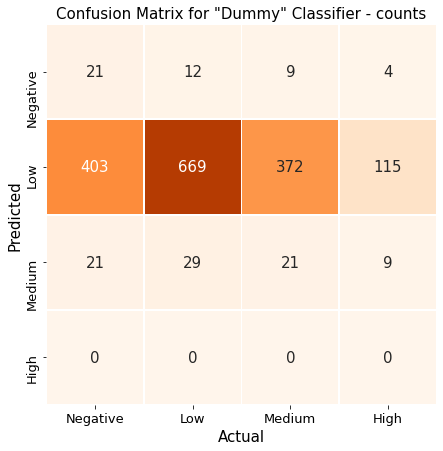

In [134]:
cm_logis = confusion_matrix(y_test, prediction_2)
#Put it into a df for sns plot function
cm_logis_df = pd.DataFrame(cm_logis)

#Use a sns heatmap to plot confusion matrices 
#The df is transposed to make actual values on x-axis and predicted on y-axis
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot = True, annot_kws={'size':15}, cmap = 'Oranges', vmin = 0, vmax = 800, fmt = '.0f', 
           linewidths = 1, linecolor = 'white', cbar = False)
plt.ylabel('Predicted', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
ax.set_xticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
ax.set_yticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
plt.title('Confusion Matrix for "Dummy" Classifier - counts', fontsize = 15 )
plt.show()

In [236]:
df_2
neg = df_2[df_2.clase == 'neg']
low = df_2[df_2.clase == 'low']
med = df_2[df_2.clase == 'med']
hig = df_2[df_2.clase == 'hig']

In [237]:
#upsample minority
neg_upsampled = resample(neg, replace = True, n_samples = 1500)
med_upsampled = resample(med, replace = True, n_samples = 2000)
hig_upsampled = resample(hig, replace = True, n_samples = 2000)


In [238]:
upsampled = pd.concat([neg_upsampled, low, med_upsampled, hig_upsampled])

In [239]:
upsampled

id  type  skin  number_traits  rarity   0   1   2   3 clase
485   1561     4     5            4.0    2670  24   0  85  83   neg
1503  3253     4     7            3.0    2520  48  84  23   0   neg
481   1555     5     7            2.0    3813  32  49   0   0   neg
5204  9303     4     7            2.0    8514  63  67   0   0   neg
2218  4348     4     6            3.0    5817  43  83  74   0   neg
...    ...   ...   ...            ...     ...  ..  ..  ..  ..   ...
3703  6833     5     7            3.0    5891   0  64  44   0   hig
207    907     4     5            2.0    2690  24  85   0   0   hig
2250  4407     5     5            3.0    9497  80  77  71   0   hig
2492  4879     5     5            3.0    9396  86  70  79   0   hig
3654  6748     5     7            2.0    7123  60  52   0   0   hig

[7942 rows x 10 columns]

In [240]:
X = upsampled.drop('clase', axis = 1)
y = upsampled.clase

In [292]:
upsampled.clase.value_counts()

low    2442
hig    2000
med    2000
neg    1500
Name: clase, dtype: int64

In [241]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [243]:
clf_mod.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [244]:
prediction_3 = clf_mod.predict(X_test)

In [245]:
print(metrics.accuracy_score(y_test,prediction_3))

0.536718422156945


In [246]:
print('Accuracy: ', accuracy_score(y_test, prediction_3))
print('f1_score: ', f1_score(y_test, prediction_3, average = 'weighted'))
print('recal_socre: ' ,recall_score(y_test, prediction_3, average = 'weighted'))

Accuracy:  0.536718422156945
f1_score:  0.5417539637651361
recal_socre:  0.536718422156945


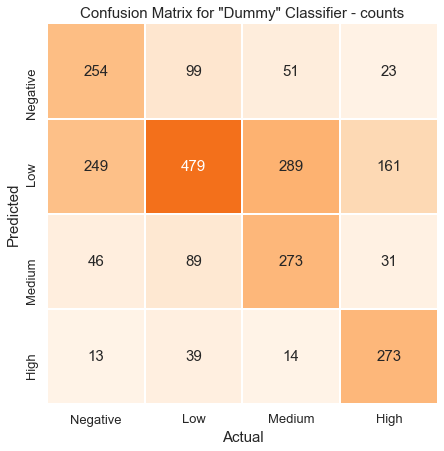

In [247]:
cm_logis = confusion_matrix(y_test, prediction_3)
#Put it into a df for sns plot function
cm_logis_df = pd.DataFrame(cm_logis)

#Use a sns heatmap to plot confusion matrices 
#The df is transposed to make actual values on x-axis and predicted on y-axis
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_logis_df.T, annot = True, annot_kws={'size':15}, cmap = 'Oranges', vmin = 0, vmax = 800, fmt = '.0f', 
           linewidths = 1, linecolor = 'white', cbar = False)
plt.ylabel('Predicted', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
ax.set_xticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
ax.set_yticklabels(['Negative', 'Low', 'Medium','High'], fontsize = 13)
plt.title('Confusion Matrix for "Dummy" Classifier - counts', fontsize = 15 )
plt.show()

In [208]:
df_2

Unnamed: 0    id  type  skin  number_traits  rarity   0   1   2   3  \
0             13     0     4     7            4.0    2023  21   0  43   0   
1             29     1     5     5            2.0    4352  69  35   0   0   
2            184    14     4     5            3.0     155  85   3  58   0   
3            288    53     4     6            2.0    2825  80  25   0   0   
4            439   116     4     5            4.0     220  82  63   0   4   
...          ...   ...   ...   ...            ...     ...  ..  ..  ..  ..   
5609       45813  9979     5     6            4.0    7564  86   0  81  55   
5610       45818  9980     4     7            4.0    1159  82  13  86  76   
5611       45848  9989     4     5            3.0     186  86  85   3   0   
5612       45855  9990     5     4            2.0    9186  79  69   0   0   
5613       45887  9998     4     7            3.0    1271  82  62  14   0   

     clase  
0      low  
1      med  
2      low  
3      low  
4      low  
...    ...  
5609   low  
5610   hig  
5611   low  
5612   neg  
5613   med  

[5614 rows x 11 columns]

In [211]:
feature_cols = ['unnamed','id','type','skin','number_traits','rarity','trait_1','trait_2','trait_3','trait_4']

In [215]:
import graphviz
from sklearn.tree import export_graphviz


In [217]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(clf.estimators_[1], 
                           feature_names=feature_cols,
                           class_names=['neg','low','med','hig'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [218]:
graph.render('tree')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.429737 to fit


'tree.png'

In [249]:
df_2

id  type  skin  number_traits  rarity   0   1   2   3 clase
0        0     4     7            4.0    2023  21   0  43   0   low
1        1     5     5            2.0    4352  69  35   0   0   med
2       14     4     5            3.0     155  85   3  58   0   low
3       53     4     6            2.0    2825  80  25   0   0   low
4      116     4     5            4.0     220  82  63   0   4   low
...    ...   ...   ...            ...     ...  ..  ..  ..  ..   ...
5609  9979     5     6            4.0    7564  86   0  81  55   low
5610  9980     4     7            4.0    1159  82  13  86  76   hig
5611  9989     4     5            3.0     186  86  85   3   0   low
5612  9990     5     4            2.0    9186  79  69   0   0   neg
5613  9998     4     7            3.0    1271  82  62  14   0   med

[5614 rows x 10 columns]

In [248]:
clf_mod.feature_importances_

array([0.22102539, 0.02617045, 0.06507726, 0.02541353, 0.23954538,
       0.13303151, 0.1465657 , 0.10647911, 0.03669166])

In [253]:
df_3 = upsampled.drop(['type', 'skin', 'number_traits', '3'], axis = 1)

In [255]:
X = df_3.drop('clase', axis = 1)
y = df_3.clase

In [256]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [267]:
clf_mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [268]:
prediction_3 = clf_mod.predict(X_test)

In [269]:
print('Accuracy: ', accuracy_score(y_test, prediction_3))
print('f1_score: ', f1_score(y_test, prediction_3, average = 'weighted'))
print('recal_socre: ' ,recall_score(y_test, prediction_3, average = 'weighted'))

Accuracy:  0.502308015107008
f1_score:  0.5068335813640953
recal_socre:  0.502308015107008


In [262]:
clf_mod.feature_importances_

array([0.26334651, 0.29826197, 0.14821443, 0.16532374, 0.12485335])

In [263]:
from sklearn.preprocessing import StandardScaler

In [265]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [271]:
df_2

id  type  skin  number_traits  rarity   0   1   2   3 clase
0        0     4     7            4.0    2023  21   0  43   0   low
1        1     5     5            2.0    4352  69  35   0   0   med
2       14     4     5            3.0     155  85   3  58   0   low
3       53     4     6            2.0    2825  80  25   0   0   low
4      116     4     5            4.0     220  82  63   0   4   low
...    ...   ...   ...            ...     ...  ..  ..  ..  ..   ...
5609  9979     5     6            4.0    7564  86   0  81  55   low
5610  9980     4     7            4.0    1159  82  13  86  76   hig
5611  9989     4     5            3.0     186  86  85   3   0   low
5612  9990     5     4            2.0    9186  79  69   0   0   neg
5613  9998     4     7            3.0    1271  82  62  14   0   med

[5614 rows x 10 columns]

In [273]:
df_4 = upsampled.drop(['id', 'rarity'], axis = 1)

In [275]:
X = df_4.drop('clase', axis = 1)
y = df_4.clase

In [276]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,encoded, test_size = 0.3,
                                                   random_state = 42)

In [278]:
clf_mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1000)

In [279]:
prediction_3 = clf_mod.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction_3))
print('f1_score: ', f1_score(y_test, prediction_3, average = 'weighted'))
print('recal_socre: ' ,recall_score(y_test, prediction_3, average = 'weighted'))

Accuracy:  0.49727234578262697
f1_score:  0.49776781876243514
recal_socre:  0.49727234578262697


In [281]:
clf_mod.feature_importances_

array([0.03697158, 0.10332157, 0.04471529, 0.25638438, 0.28926252,
       0.19490428, 0.0744404 ])